In [5]:

import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import k_means

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
cd /content/drive/MyDrive/MLPNS/

/content/drive/MyDrive/MLPNS


In [16]:
ls

country_pop.xls                     kaggle.json
healthcare-dataset-stroke-data.csv  stroke-prediction-dataset.zip


In [22]:
initialData = pd.read_excel("country_pop.xls",
                            header = 3, usecols = "A,E:BL", index_col=(0))

In [18]:
initialData.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


counting lost observations

In [20]:
countryCounter = 0
dataCounter = 0
for i in initialData.index:
    dataCounter = dataCounter + initialData.loc[i].isna().sum()
    if initialData.loc[i].isna().sum() != 0:
          countryCounter = countryCounter + 1

In [24]:
removedPerc = dataCounter/(len(initialData)*len(initialData.T))*100
        
print("The number of countries that will be removed is " + str(countryCounter))
print("The number of empty data entries is " + str(dataCounter))
print("The percentage of removed data is around %0.2f"%(removedPerc) + "%") 

The number of countries that will be removed is 6
The number of empty data entries is 169
The percentage of removed data is around 1.07%


In [25]:
cleanData = initialData.dropna()

In [26]:
popvals = np.array([cleanData.loc[i].values],float).reshape(60,1)
logpopvals = np.log(np.array([cleanData.loc[i].values],float).reshape(60,1))

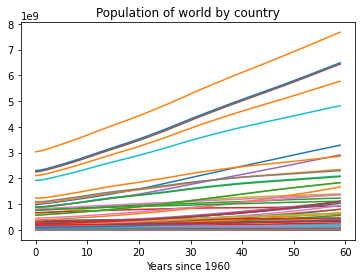

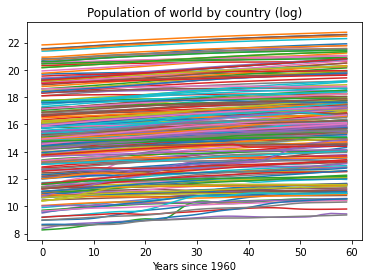

In [28]:
for i in cleanData.index:
      popplot = plt.plot(np.array([cleanData.loc[i].values],float).reshape(60,1))
      plt.title("Population of world by country")
      plt.xlabel("Years since 1960")
plt.show()

for i in cleanData.index:
    popplot = plt.plot(np.log(np.array([cleanData.loc[i].values],float)).reshape(60,1))
    plt.title("Population of world by country (log)")
    plt.xlabel("Years since 1960")
plt.show()

In [29]:
rows = cleanData.shape[0]
columns = cleanData.shape[1]
procdata = np.array([[0.0]*columns]*rows)
ndivprocdata = np.array([[0.0]*columns]*rows)

In [30]:
for i in range(len(cleanData.index)):
    ndivprocdata[i,:] = (np.array([cleanData.iloc[i].values]) - 
    np.array([cleanData.iloc[i].values]).mean())
    procdata[i,:] = np.divide(ndivprocdata[i,:],np.std(ndivprocdata[i,:]))

In [31]:
def parab(x,a,b,c):
      return a*x**2 + b*x + c

In [32]:
x = np.arange(0,60)
features = np.array([[0.0]*3]*rows)
for i in range(features.shape[0]):
    fit = np.polyfit(x,procdata[i,:],2)
    features[i,:] = fit

In [33]:
procfeatures = np.array([[0.0]*3]*rows)

In [35]:
for i in range(rows):
    procfeatures[i,:] = np.divide(features[i,:] - features[i,:].mean(), np.std(features[i,:]))

In [36]:
c = k_means(procfeatures,4,random_state=(123))

c0 = cleanData[c[1] == 0]
c1 = cleanData[c[1] == 1]
c2 = cleanData[c[1] == 2]
c3 = cleanData[c[1] == 3]

In [37]:
print("Countries belonging to cluster 0 are: " +
      str(c0.index))
print("Countries belonging to cluster 1 are: " +
      str(c1.index))
print("Countries belonging to cluster 2 are: " +
      str(c2.index))
print("Countries belonging to cluster 3 are: " +
      str(c3.index))
                  

Countries belonging to cluster 0 are: Index(['Aruba', 'Afghanistan', 'Angola', 'Arab World', 'United Arab Emirates',
       'Antigua and Barbuda', 'Austria', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bahrain', 'Belize', 'Switzerland', 'Cote d'Ivoire',
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde',
       'Cayman Islands', 'Cyprus', 'Egypt, Arab Rep.', 'Ethiopia',
       'Fragile and conflict affected situations', 'Gabon', 'United Kingdom',
       'Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea',
       'Grenada', 'Guatemala', 'Honduras',
       'Heavily indebted poor countries (HIPC)', 'IDA total', 'IDA blend',
       'IDA only', 'Ireland', 'Iraq', 'Israel', 'Jordan', 'Kenya', 'Cambodia',
       'Kiribati', 'Lebanon', 'Liberia',
       'Least developed countries: UN classification', 'Low income',
       'Luxembourg', 'Macao SAR, China', 'Madagascar', 'Maldives', 'Mali',
       'Malta', 'Mozambique', 'Mauritania', 'Malaw

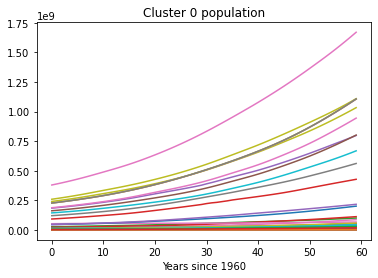

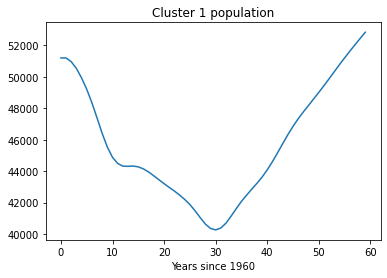

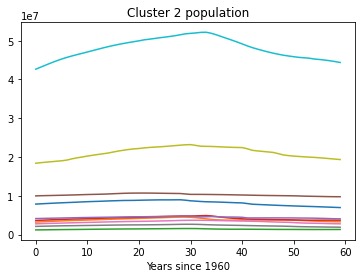

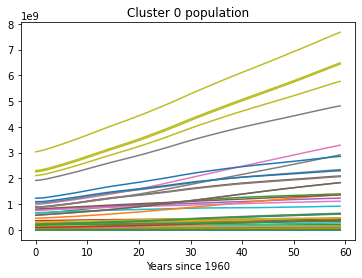

In [39]:
for i in c0.index:
      popplot = plt.plot(np.array([c0.loc[i].values],float).reshape(60,1))
      plt.title("Cluster 0 population")
      plt.xlabel("Years since 1960")
plt.show()

for i in c1.index:
      popplot = plt.plot(np.array([c1.loc[i].values],float).reshape(60,1))
      plt.title("Cluster 1 population")
      plt.xlabel("Years since 1960")
plt.show()

for i in c2.index:
      popplot = plt.plot(np.array([c2.loc[i].values],float).reshape(60,1))
      plt.title("Cluster 2 population")
      plt.xlabel("Years since 1960")
plt.show()

for i in c3.index:
      popplot = plt.plot(np.array([c3.loc[i].values],float).reshape(60,1))
      plt.title("Cluster 0 population")
      plt.xlabel("Years since 1960")
plt.show()